In [16]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/User Story and User Story Scenario_Revisi 2 - Copy.xlsx")
df = df.fillna('')
df.drop(df[df['Project Name'] == 'Akobesi'].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Jisebi Checker,Login,In order to access manuscript checker\nAs User...,Scenario: Login Successfully\nGiven I am on “h...,Scenario: Login failed due to Incorrect Userna...,,,,,,,,,,S
1,Jisebi Checker,Sign up,"In order to create a new account\nAs User,\nI ...",Scenario: Sign Up Successfully\nGiven I am on ...,Scenario: Sign Up failed due to empty data fie...,Scenario: Sign Up failed due to a mismatch in ...,Scenario: Sign Up failed as the username has a...,Scenario: Sign Up failed as the email has alre...,,,,,,,S
2,Jisebi Checker,Log out,"In order to secure my session\nAs User,\nI wan...",Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
3,Jisebi Checker,Change password,"In order to secure my account\nAs User,\nI wan...",Scenario: Password Change Successfully\nGiven ...,Scenario: Password change failed due to simila...,Scenario: Password Change Failed due to empty ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,S
4,Jisebi Checker,Reset password,In order to log in to the system in case i for...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,Scenario: Password Reset Failed due to empty d...,,,,,,,,,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,User Story Generator,Update user story,"In order to improve user story\nAs User,\nI wa...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
87,User Story Generator,Create user story scenario,In order to generate detailed user story \nAs ...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XXL
88,User Story Generator,Update user story scenario,In order to improve detailed user story \nAs U...,Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
89,User Story Generator,Read user story History,In order to review the relevant user story\nAs...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


In [17]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
print(df.loc[0, 'combined'])

Login
In order to access manuscript checker
As User,
I want to log in to the system
Scenario: Login Successfully
Given I am on “http://127.0.0.1:8000/landing-page”
When I press "Login"
Then the url should match "http://127.0.0.1:8000/login”
When I fill in “Username” with “Yamamaru”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard”
And the “User Name” field should contain “Yamamaru”
Scenario: Login failed due to Incorrect Username or Password
Given I am on “http://127.0.0.1:8000/landing-page”
When I press "Login"
Then the url should match "http://127.0.0.1:8000/login”
When I fill in “Username” with “Yamamaru”
And I fill in “Password” with “coba1234”
And I press “Login”
Then the response should contain “Incorrect Username or Password”










In [18]:
# Numeric Feature Extraction
import re

def count_when_then_pair(text):
    # Mencari kemunculan "when" dan "then" secara terpisah
    matches_when = re.findall(r'\bwhen\b', text)
    matches_then = re.findall(r'\bthen\b', text)
    
    # Menghitung jumlah pasangan "when" dan "then"
    count_pair = min(len(matches_when), len(matches_then))
    
    return count_pair

# Menghitung jumlah token dan skenario
df['combined'] = df['combined'].str.lower()
df['number_word'] = df['combined'].apply(lambda x: len(x.split()))
df['number_scenario'] = df['combined'].apply(lambda x: x.count("scenario:"))
df['number_of_step'] = df['combined'].apply(count_when_then_pair)
df['number_of_S1'] = df['combined'].apply(lambda x: x.count("i am on"))
df['number_of_S2'] = df['combined'].apply(lambda x: x.count("i press"))
df['number_of_S3'] = df['combined'].apply(lambda x: x.count("i follow"))
df['number_of_F1'] = df['combined'].apply(lambda x: x.count("i fill in "))
df['number_of_F2'] = df['combined'].apply(lambda x: x.count("i select"))
df['number_of_F3'] = df['combined'].apply(lambda x: x.count("i check"))
df['number_of_F4'] = df['combined'].apply(lambda x: x.count("i uncheck"))
df['number_of_F5'] = df['combined'].apply(lambda x: x.count("i attach"))
df['number_of_A1'] = df['combined'].apply(lambda x: x.count("i should see"))
df['number_of_A2'] = df['combined'].apply(lambda x: x.count("the response should contain"))
df['number_of_A3'] = df['combined'].apply(lambda x: x.count("field should contain"))
df['number_of_A4'] = df['combined'].apply(lambda x: x.count("checkbox should be checked"))
df['number_of_A5'] = df['combined'].apply(lambda x: x.count("checkbox should not be checked"))
df['number_of_A6'] = df['combined'].apply(lambda x: x.count("i should be on"))
df['number_of_A7'] = df['combined'].apply(lambda x: x.count("the url should match"))

print(df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']])

    number_word  number_scenario  number_of_step  number_of_S1  number_of_S2  \
0           118                2               4             2             4   
1           365                5              10             5            10   
2            42                1               1             1             2   
3           366                5               9             5            15   
4           419                3              18             3            15   
..          ...              ...             ...           ...           ...   
86          290                2               6             2             6   
87          358                2               8             2             6   
88          452                2              10             2             8   
89          125                2               3             2             3   
90           71                1               2             1             1   

    number_of_S3  number_of_F1  number_

Text Feature Extraction

In [19]:
# Case Folding and Remove Template
import re

def case_folding(text):
    return text.lower()

def remove_template_phrases(text):
    template_texts = [
        "In order to",
        "As",
        "I want",
        "I am on",
        "I press",
        "I follow",
        "I fill in",
        "I select",
        "I check",
        "I uncheck",
        "I attach the file",
        "I should see",
        "The response should contain",
        "field should contain",
        "checkbox should be checked",
        "checkbox should not be checked",
        "I should be on",
        "The url should match"
    ]

    pattern = r'\s+(' + '|'.join(template_texts) + r')\s+'
    return re.sub(pattern, ' ', text, flags=re.IGNORECASE)

df['combined'] = df['combined'].apply(case_folding)
df['combined'] = df['combined'].apply(remove_template_phrases)

In [20]:
# Remove Punctuation, Tokenisasi, Stopword Removal
import string
def remove_punctuation(text):
    punctuation_to_replace = string.punctuation + "‘’“”"
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    cleaned_text = text.translate(translation_table)
    return cleaned_text

df['combined'] = df['combined'].apply(remove_punctuation)
print("Hasil pembersihan teks dari tanda baca")
print(df.loc[0, 'combined'])

# Tokenisasi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['combined'] = df['combined'].apply(lambda x: word_tokenize(x))
print("Hasil tokenisasi")
print(df['combined'])

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['combined'] = df['combined'].apply(remove_stopwords)
print("Hasil stopword removal")
print(df['combined'][4])

Hasil pembersihan teks dari tanda baca
login access manuscript checker user  to log in to the system
scenario  login successfully
given  http   127 0 0 1 8000 landing page 
when  login 
then  http   127 0 0 1 8000 login 
when  username  with  yamamaru 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard 
and the  user name   yamamaru 
scenario  login failed due to incorrect username or password
given  http   127 0 0 1 8000 landing page 
when  login 
then  http   127 0 0 1 8000 login 
when  username  with  yamamaru 
and  password  with  coba1234 
and  login 
then  incorrect username or password 








Hasil tokenisasi
0     [login, access, manuscript, checker, user, to,...
1     [sign, up, create, a, new, account, user, to, ...
2     [log, out, secure, my, session, user, to, log,...
3     [change, password, secure, my, account, user, ...
4     [reset, password, log, in, to, the, system, in...
                            ...                        
86    [up

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Lematisasi
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['combined'] = df['combined'].apply(lemmatize_tokens)
print("Hasil lematisasi")
df['combined']

Hasil lematisasi


0     [login, access, manuscript, checker, user, log...
1     [sign, create, new, account, user, sign, accou...
2     [log, secure, session, user, log, system, scen...
3     [change, password, secure, account, user, capa...
4     [reset, password, log, system, case, forget, p...
                            ...                        
86    [update, user, story, improve, user, story, us...
87    [create, user, story, scenario, generate, deta...
88    [update, user, story, scenario, improve, detai...
89    [read, user, story, history, review, relevant,...
90    [delete, user, story, history, remove, irrelev...
Name: combined, Length: 91, dtype: object

In [22]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengembalikan ke bentuk string
df['combined'] = df['combined'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,04,127,15,198110282006041003,20,2024,40fst,40gmail,56426242200,57202163318,...,user,username,verify,version,view,within,wlfv,x0002,xlsx,yamamaru
0,0.0,0.178444,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.080467,0.360608,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250935
1,0.0,0.106758,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.010941,0.171612,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.045493
2,0.0,0.171659,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.193517,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.071577,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.048415,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083879
4,0.0,0.130323,0.0,0.076334,0.0,0.0,0.0,0.174758,0.0,0.0,...,0.009182,0.123452,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.171812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.037453,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.306109,0.000000,0.0,0.0,0.0,0.109896,0.0,0.0,0.0,0.000000
87,0.0,0.058139,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.290261,0.000000,0.0,0.0,0.0,0.064989,0.0,0.0,0.0,0.000000
88,0.0,0.055528,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.305170,0.000000,0.0,0.0,0.0,0.054311,0.0,0.0,0.0,0.000000
89,0.0,0.064315,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.265851,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [23]:
# Data Integration
integrated_data = pd.concat([tfidf_df, df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']]], axis=1)
integrated_data

,04,127,15,198110282006041003,20,2024,40fst,40gmail,56426242200,57202163318,...,number_of_F3,number_of_F4,number_of_F5,number_of_A1,number_of_A2,number_of_A3,number_of_A4,number_of_A5,number_of_A6,number_of_A7
0,0.0,0.178444,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,1,1,0,0,0,3
1,0.0,0.106758,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,5,0,0,0,0,6
2,0.0,0.171659,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.071577,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,5,0,0,0,0,5
4,0.0,0.130323,0.0,0.076334,0.0,0.0,0.0,0.174758,0.0,0.0,...,0,0,0,0,9,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.037453,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,4,2,0,0,2,2
87,0.0,0.058139,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,3,3,0,0,4,3
88,0.0,0.055528,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,4,2,0,0,4,4
89,0.0,0.064315,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,1,3,0,0,0,0


In [24]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
XXL: 4
Dense array representation of encoded 'Effort' categories:
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [

Class distribution:
L: 0.02
M: 0.10
S: 0.73
XL: 0.05
XXL: 0.10
Total count of each class:
L: 2.0
M: 9.0
S: 66.0
XL: 5.0
XXL: 9.0


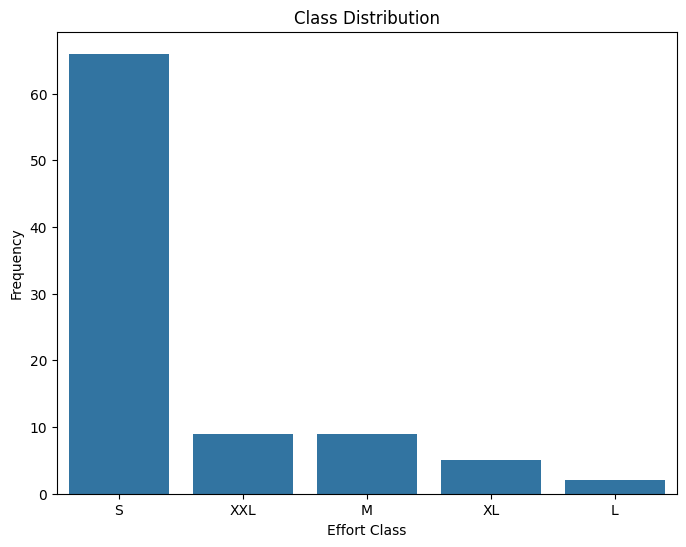

In [25]:
# Distribusi Kelas
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = np.sum(effort_dense_array, axis=0) / len(effort_dense_array)

# Display class distribution
print("Class distribution:")
for label, distribution in zip(encoder.categories_[0], class_distribution):
    print(f"{label}: {distribution:.2f}")
# Calculate total count of each class
class_totals = np.sum(effort_dense_array, axis=0)

# Display total count of each class
print("Total count of each class:")
for label, total in zip(encoder.categories_[0], class_totals):
    print(f"{label}: {total}")

# Hitung total dari setiap kelas dalam target variabel (Effort)
class_distribution = df['Effort'].value_counts()

# Visualisasikan distribusi kelas menggunakan plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Effort Class')
plt.ylabel('Frequency')
plt.show()

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      0.83      0.91         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.71      0.62      0.67         8
   macro avg       0.20      0.17      0.18         8
weighted avg       0.75      0.62      0.68         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.75     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.6818181818181818

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

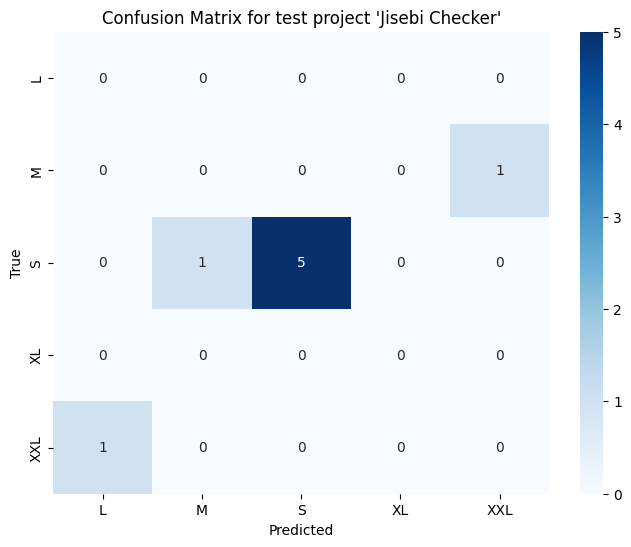

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.83      0.83      0.83         6
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.60      0.75      0.67         8
   macro avg       0.27      0.37      0.30         8
weighted avg       0.69      0.75      0.71         8
 samples avg       0.67      0.75      0.69         8

Precision: 0.6875     Recall: 0.75      Accuracy: 0.625      F1 Score: 0.7083333333333334

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

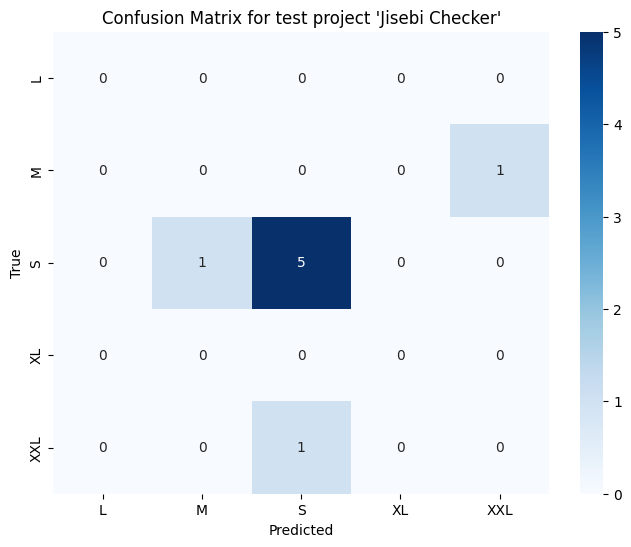

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      1.00      1.00         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       1.00      0.75      0.86         8
   macro avg       0.20      0.20      0.20         8
weighted avg       0.75      0.75      0.75         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.75     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.75

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

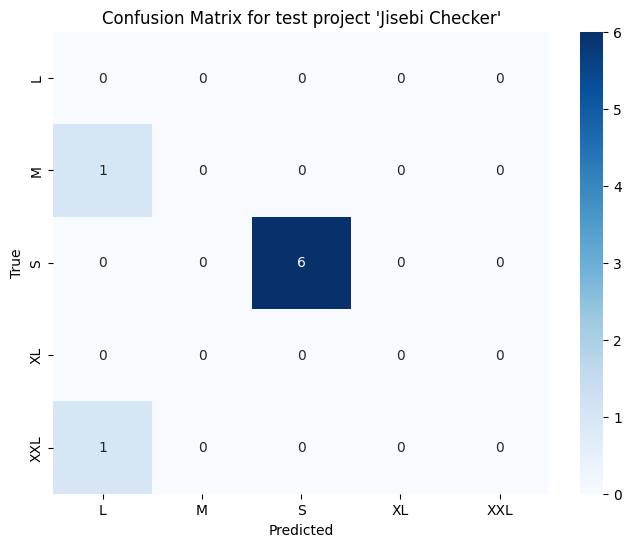

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.70      0.70      0.70        10
   macro avg       0.27      0.33      0.26        10
weighted avg       0.93      0.70      0.77        10
 samples avg       0.70      0.70      0.70        10

Precision: 0.9333333333333333     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.77

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

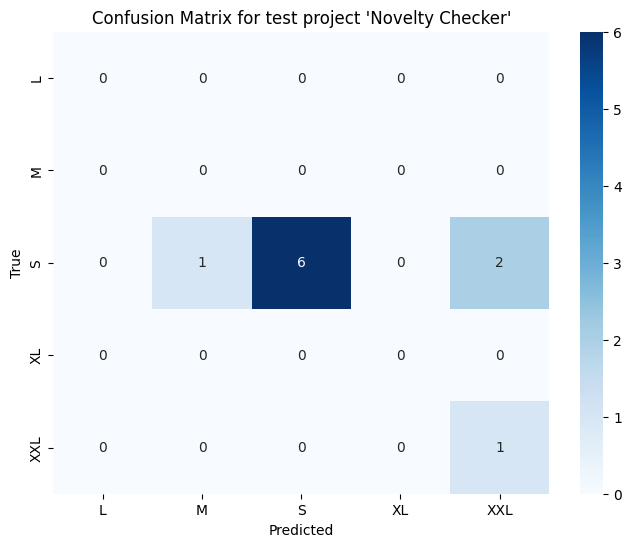

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         9
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00         1

   micro avg       0.88      0.70      0.78        10
   macro avg       0.40      0.33      0.36        10
weighted avg       1.00      0.70      0.82        10
 samples avg       0.70      0.70      0.70        10

Precision: 1.0     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.82

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

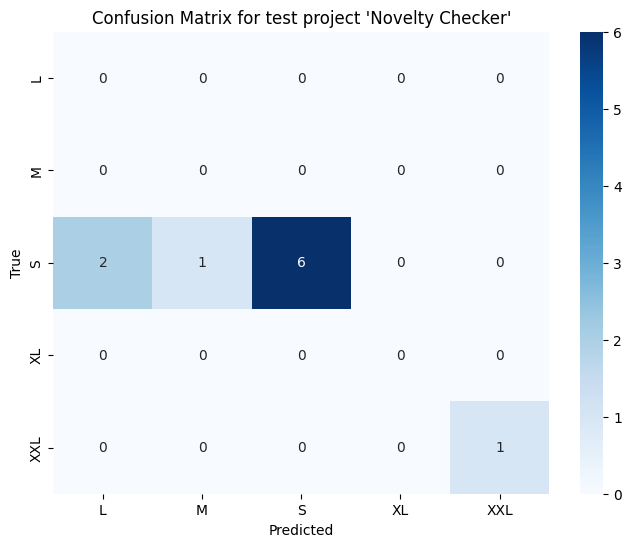

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.78      0.88         9
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       1.00      0.70      0.82        10
   macro avg       0.20      0.16      0.18        10
weighted avg       0.90      0.70      0.79        10
 samples avg       0.70      0.70      0.70        10



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.9     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.7875000000000001

Confusion matrix for test project 'Novelty Checker':


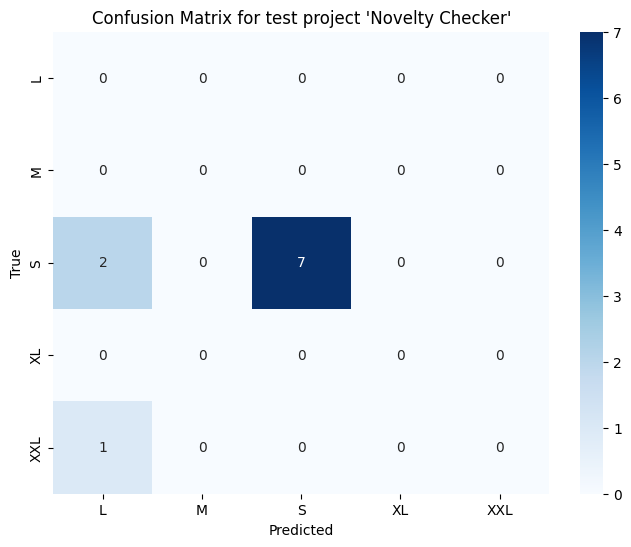

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           S       0.71      1.00      0.83        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71        14
   macro avg       0.14      0.20      0.17        14
weighted avg       0.51      0.71      0.60        14
 samples avg       0.71      0.71      0.71        14

Precision: 0.5102040816326531     Recall: 0.7142857142857143      Accuracy: 0.7142857142857143      F1 Score: 0.5952380952380951

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


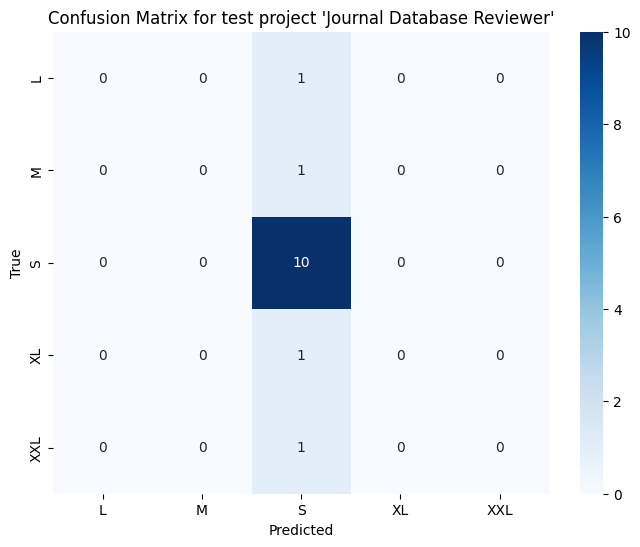

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           S       0.75      0.90      0.82        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.60      0.64      0.62        14
   macro avg       0.15      0.18      0.16        14
weighted avg       0.54      0.64      0.58        14
 samples avg       0.61      0.64      0.62        14

Precision: 0.5357142857142857     Recall: 0.6428571428571429      Accuracy: 0.5714285714285714      F1 Score: 0.5844155844155844

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

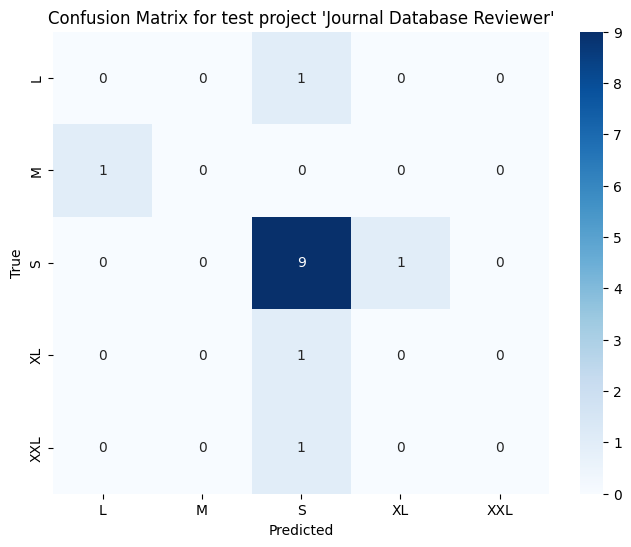

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           S       0.67      0.60      0.63        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.67      0.43      0.52        14
   macro avg       0.13      0.12      0.13        14
weighted avg       0.48      0.43      0.45        14
 samples avg       0.43      0.43      0.43        14

Precision: 0.47619047619047616     Recall: 0.42857142857142855      Accuracy: 0.42857142857142855      F1 Score: 0.4511278195488722

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

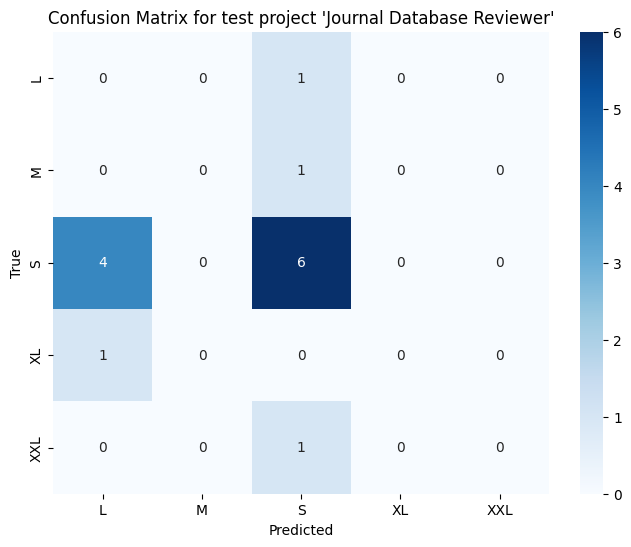

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.67      0.67      0.67         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.29      0.33      0.31         6
   macro avg       0.13      0.13      0.13         6
weighted avg       0.33      0.33      0.33         6
 samples avg       0.33      0.33      0.33         6

Precision: 0.3333333333333333     Recall: 0.3333333333333333      Accuracy: 0.3333333333333333      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

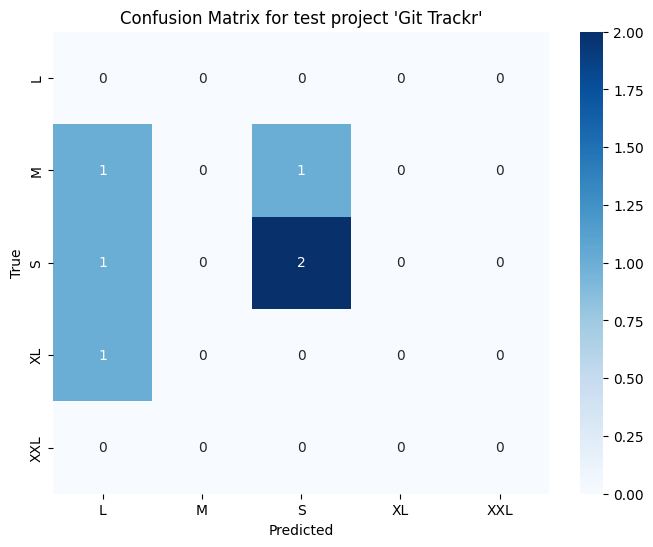

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.67      0.67      0.67         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.29      0.33      0.31         6
   macro avg       0.13      0.13      0.13         6
weighted avg       0.33      0.33      0.33         6
 samples avg       0.33      0.33      0.33         6

Precision: 0.3333333333333333     Recall: 0.3333333333333333      Accuracy: 0.3333333333333333      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

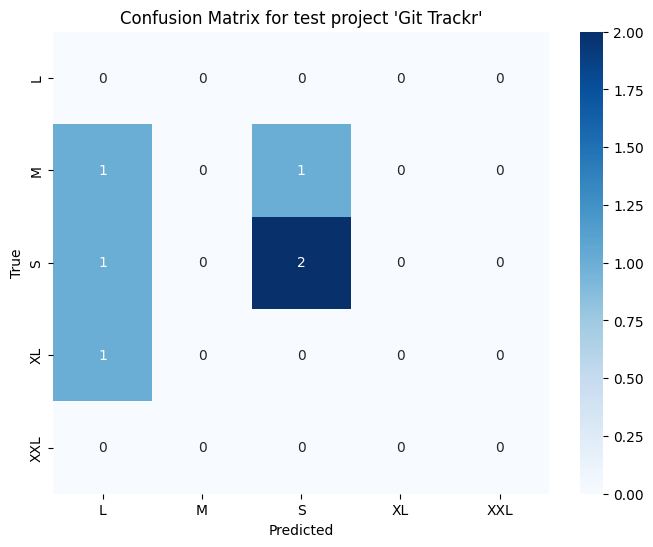

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.67      0.67      0.67         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.67      0.33      0.44         6
   macro avg       0.13      0.13      0.13         6
weighted avg       0.33      0.33      0.33         6
 samples avg       0.33      0.33      0.33         6

Precision: 0.3333333333333333     Recall: 0.3333333333333333      Accuracy: 0.3333333333333333      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

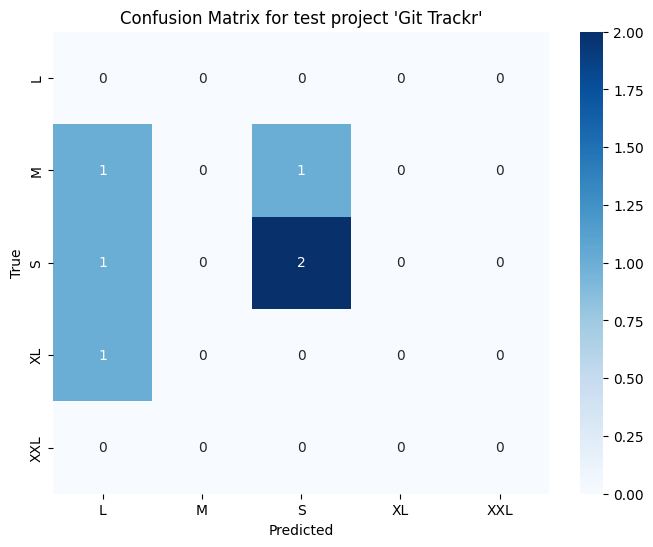

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.80      1.00      0.89         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80         5
   macro avg       0.16      0.20      0.18         5
weighted avg       0.64      0.80      0.71         5
 samples avg       0.80      0.80      0.80         5

Precision: 0.64     Recall: 0.8      Accuracy: 0.8      F1 Score: 0.7111111111111111

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

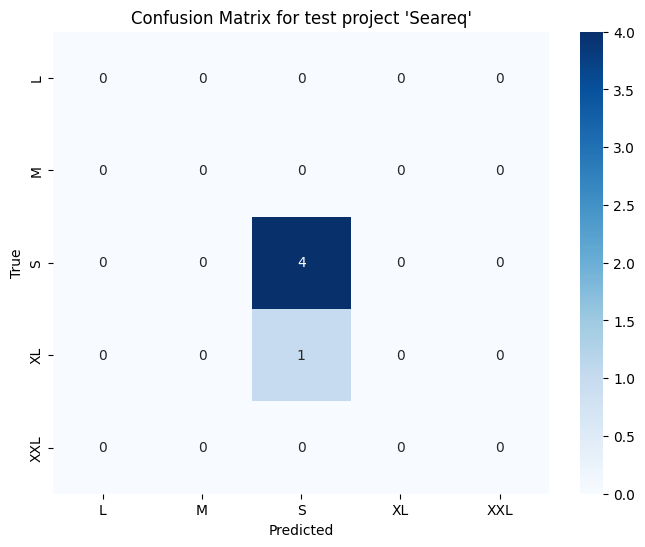

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.80      1.00      0.89         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80         5
   macro avg       0.16      0.20      0.18         5
weighted avg       0.64      0.80      0.71         5
 samples avg       0.80      0.80      0.80         5

Precision: 0.64     Recall: 0.8      Accuracy: 0.8      F1 Score: 0.7111111111111111

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

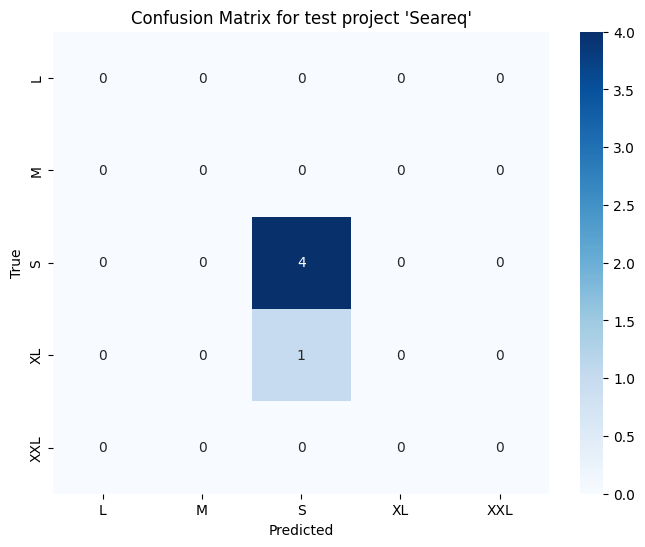

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.50      0.67         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.40      0.57         5
   macro avg       0.20      0.10      0.13         5
weighted avg       0.80      0.40      0.53         5
 samples avg       0.40      0.40      0.40         5

Precision: 0.8     Recall: 0.4      Accuracy: 0.4      F1 Score: 0.5333333333333333

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

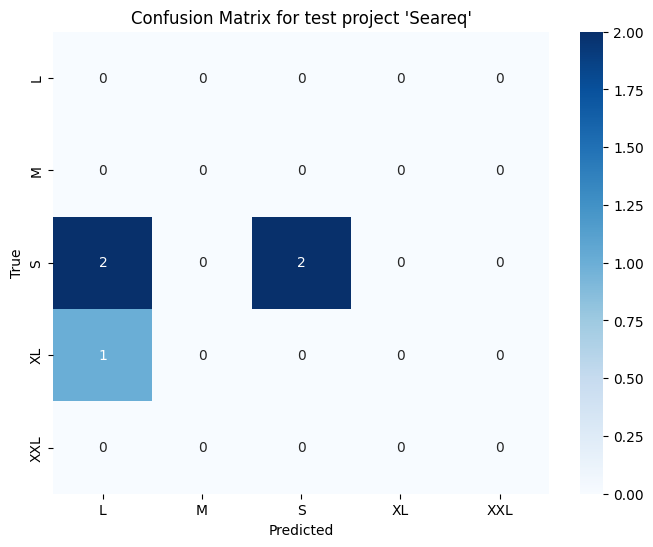

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.93      0.93      0.93        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.83      0.83      0.83        18
   macro avg       0.39      0.29      0.32        18
weighted avg       0.89      0.83      0.85        18
 samples avg       0.83      0.83      0.83        18

Precision: 0.8888888888888888     Recall: 0.8333333333333334      Accuracy: 0.8333333333333334      F1 Score: 0.8518518518518519

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

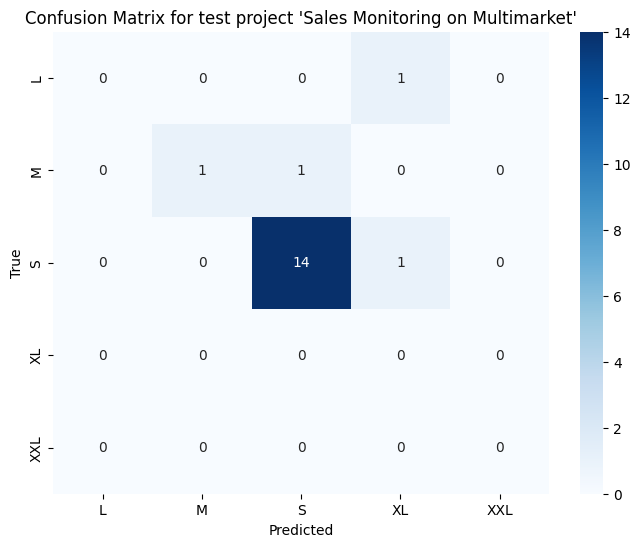

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.93      0.93      0.93        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.83      0.83      0.83        18
   macro avg       0.39      0.29      0.32        18
weighted avg       0.89      0.83      0.85        18
 samples avg       0.83      0.83      0.83        18

Precision: 0.8888888888888888     Recall: 0.8333333333333334      Accuracy: 0.8333333333333334      F1 Score: 0.8518518518518519

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

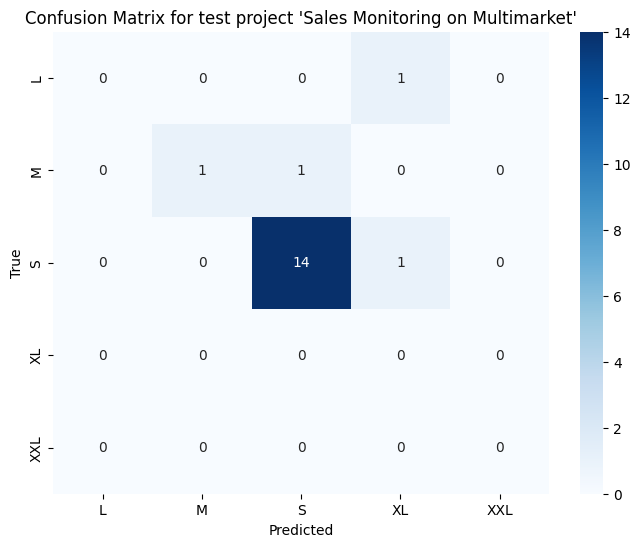

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         2
           S       0.89      0.53      0.67        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.89      0.44      0.59        18
   macro avg       0.18      0.11      0.13        18
weighted avg       0.74      0.44      0.56        18
 samples avg       0.44      0.44      0.44        18

Precision: 0.7407407407407407     Recall: 0.4444444444444444      Accuracy: 0.4444444444444444      F1 Score: 0.5555555555555557

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

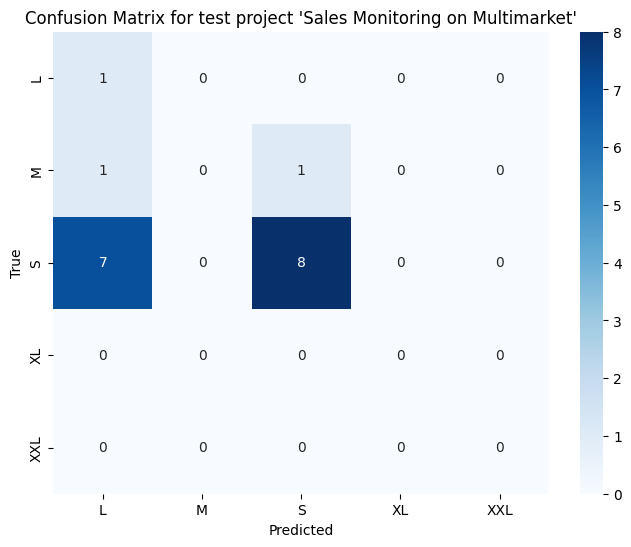

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       1.00      0.75      0.86         8
   macro avg       0.40      0.40      0.40         8
weighted avg       0.75      0.75      0.75         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.75     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.75

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

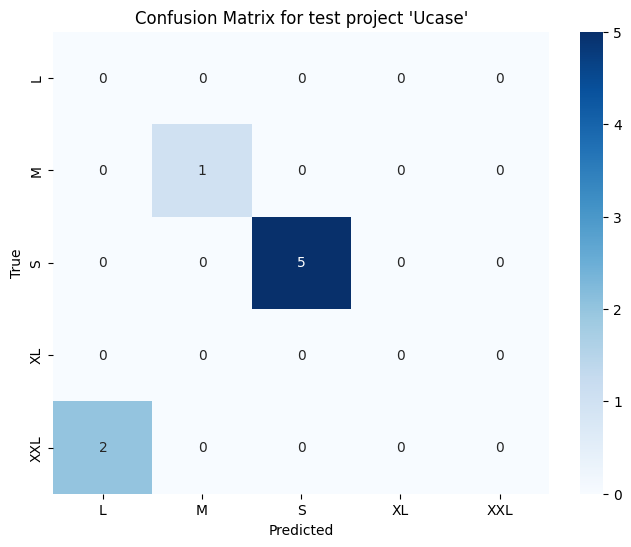

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       1.00      0.75      0.86         8
   macro avg       0.40      0.40      0.40         8
weighted avg       0.75      0.75      0.75         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.75     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.75

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

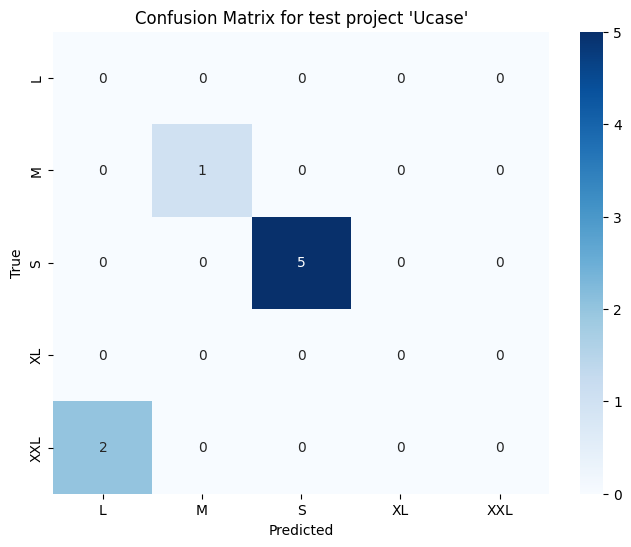

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.62      1.00      0.77         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       0.62      0.62      0.62         8
   macro avg       0.12      0.20      0.15         8
weighted avg       0.39      0.62      0.48         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.390625     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.4807692307692308

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

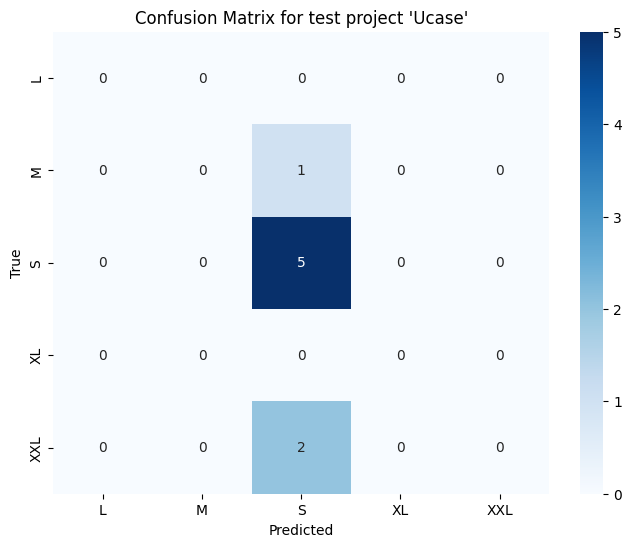

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.71      0.83         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       1.00      0.55      0.71        11
   macro avg       0.40      0.34      0.37        11
weighted avg       0.73      0.55      0.62        11
 samples avg       0.55      0.55      0.55        11

Precision: 0.7272727272727273     Recall: 0.5454545454545454      Accuracy: 0.5454545454545454      F1 Score: 0.6212121212121212

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

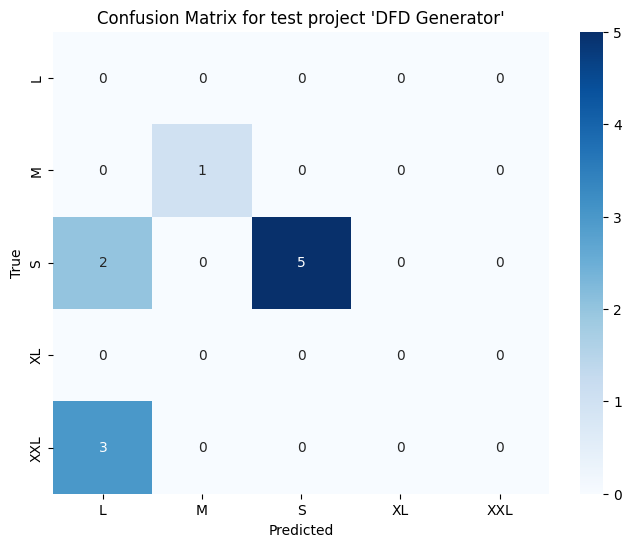

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       1.00      1.00      1.00         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       0.57      0.73      0.64        11
   macro avg       0.30      0.40      0.33        11
weighted avg       0.68      0.73      0.70        11
 samples avg       0.64      0.73      0.67        11

Precision: 0.6818181818181818     Recall: 0.7272727272727273      Accuracy: 0.5454545454545454      F1 Score: 0.696969696969697

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

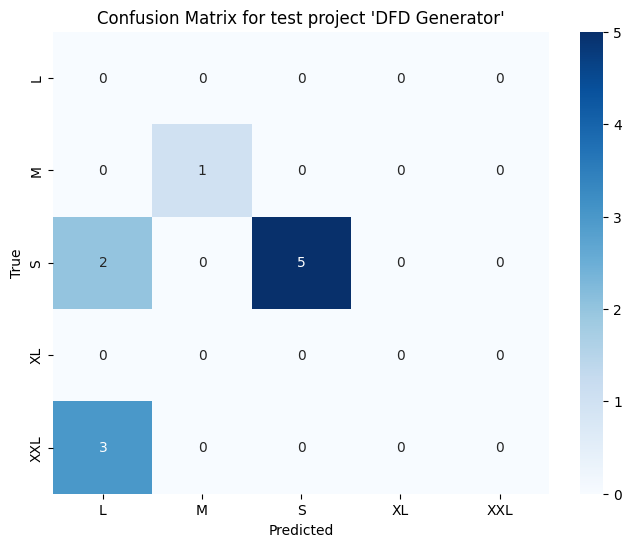

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.64      1.00      0.78         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       0.64      0.64      0.64        11
   macro avg       0.13      0.20      0.16        11
weighted avg       0.40      0.64      0.49        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.4049586776859504     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.494949494949495

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

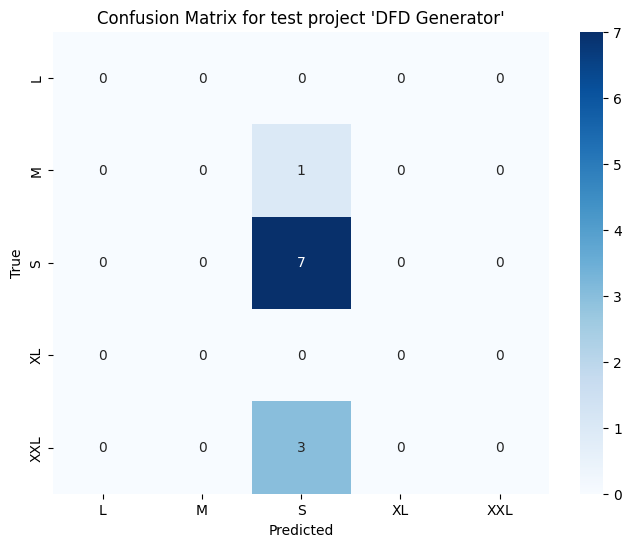

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.75      0.86      0.80         7
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         1

   micro avg       0.78      0.64      0.70        11
   macro avg       0.35      0.37      0.36        11
weighted avg       0.57      0.64      0.60        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.5681818181818182     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.6

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

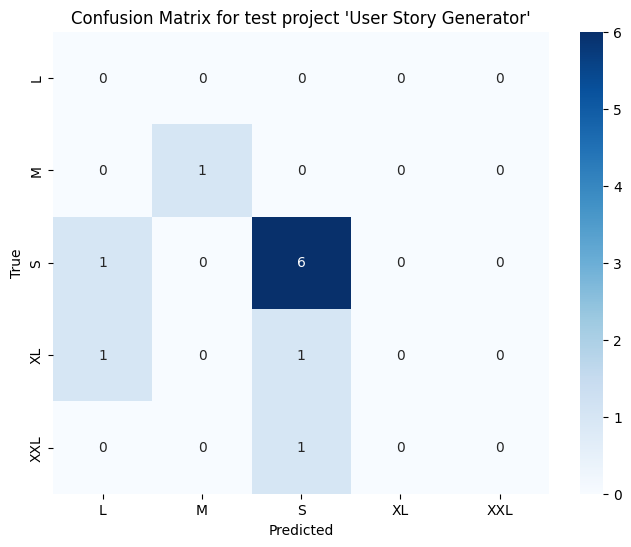

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.88      1.00      0.93         7
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         1

   micro avg       0.89      0.73      0.80        11
   macro avg       0.38      0.40      0.39        11
weighted avg       0.65      0.73      0.68        11
 samples avg       0.73      0.73      0.73        11

Precision: 0.6477272727272727     Recall: 0.7272727272727273      Accuracy: 0.7272727272727273      F1 Score: 0.6848484848484848

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

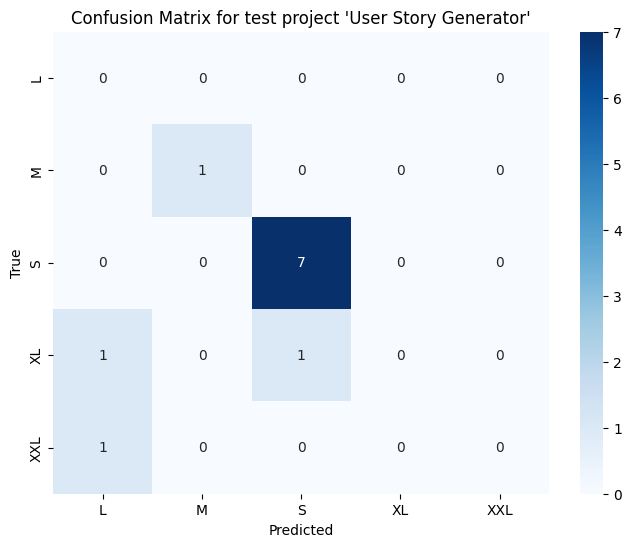

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.64      1.00      0.78         7
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         1

   micro avg       0.64      0.64      0.64        11
   macro avg       0.13      0.20      0.16        11
weighted avg       0.40      0.64      0.49        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.4049586776859504     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.494949494949495

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

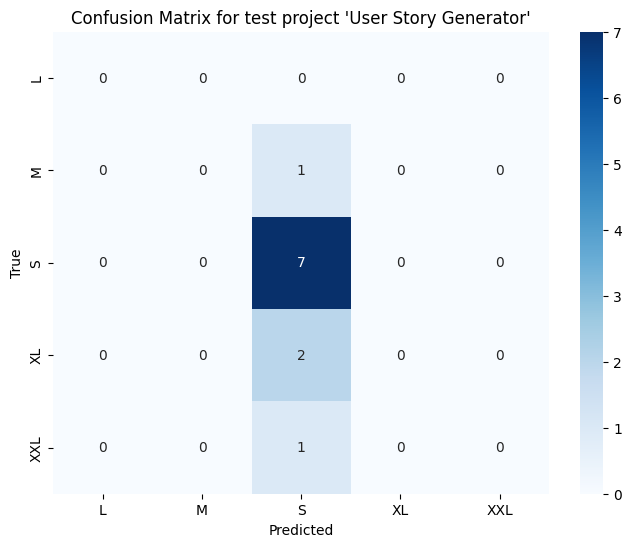

In [26]:
# Model (Teks) <== TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

unique_projects = df['Project Name'].unique()
unique_projects = np.delete(unique_projects, np.where(unique_projects == 'Akobesi'))

accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = integrated_data.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = integrated_data.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [27]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result

,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Jisebi Checker,0.750000,0.625000,0.625000,0.681818,0.687500,0.750000,0.625000,0.708333,0.750000,0.750000,0.750000,0.750000
1,Novelty Checker,0.933333,0.700000,0.700000,0.770000,1.000000,0.700000,0.700000,0.820000,0.900000,0.700000,0.700000,0.787500
2,Journal Database Reviewer,0.510204,0.714286,0.714286,0.595238,0.535714,0.642857,0.571429,0.584416,0.476190,0.428571,0.428571,0.451128
3,Git Trackr,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
4,Seareq,0.640000,0.800000,0.800000,0.711111,0.640000,0.800000,0.800000,0.711111,0.800000,0.400000,0.400000,0.533333
5,Sales Monitoring on Multimarket,0.888889,0.833333,0.833333,0.851852,0.888889,0.833333,0.833333,0.851852,0.740741,0.444444,0.444444,0.555556
6,Ucase,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.390625,0.625000,0.625000,0.480769
7,DFD Generator,0.727273,0.545455,0.545455,0.621212,0.681818,0.727273,0.545455,0.696970,0.404959,0.636364,0.636364,0.494949
8,User Story Generator,0.568182,0.636364,0.636364,0.600000,0.647727,0.727273,0.727273,0.684848,0.404959,0.636364,0.636364,0.494949


In [28]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.6597522847522848, 0.653980278980279, 0.5504529421196088]
